In [1]:
import matplotlib, sys,  os
os.environ['OPENBLAS_NUM_THREADS'] = '1'
os.environ['OMP_NUM_THREADS'] = '1'
os.environ['MKL_NUM_THREADS'] = '1'
os.environ['NUMEXPR_NUM_THREADS'] = '1'
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
sys.path.append("./mylib/")

import numpy as np
matplotlib.use('Agg')
import matplotlib.pyplot as plt

np.seterr(all="ignore")
from threeML import *
from WCDA_hal import HAL, HealpixConeROI, HealpixMapROI
import traceback
silence_warnings()
import warnings
warnings.simplefilter("ignore")
silence_warnings()
from threeML import silence_progress_bars, activate_progress_bars, toggle_progress_bars
from threeML.utils.progress_bar import trange

from astropy.io import fits
from astropy.wcs import WCS
from astropy.coordinates import SkyCoord
from astropy import units as u
# from astropy.visualization import astropy_mpl_style, imshAow_norm
from astropy.coordinates import Angle

import healpy as hp

from tqdm import tqdm

# from mylib import *
import mylib as my
from importlib import reload

Welcome to JupyROOT 6.24/06


13:16:12 WARNING   The GSL library or the pygsl wrapper cannot be loaded. Models that depend on it  ]8;id=956810;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py\functions.py]8;;\:]8;id=928477;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py#71\71]8;;\
                  will not be available.                                                                           

/data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/numba/core/decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)
/data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/numba/core/decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)


13:16:13 INFO      Starting 3ML!                                                                     ]8;id=253951;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=530056;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py#35\35]8;;\

         WARNING   WARNINGs here are NOT errors                                                      ]8;id=42922;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=435866;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py#36\36]8;;\

         WARNING   but are inform you about optional packages that can be installed                  ]8;id=836912;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=769994;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py#37\37]8;;\

         WARNING    to disable these messages, turn off start_warning in your config file            ]8;id=75771;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=140062;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py#40\40]8;;\

13:16:14 WARNING   The cthreeML package is not installed. You will not be able to use plugins which  ]8;id=901009;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=40681;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py#94\94]8;;\
                  require the C/C++ interface (currently HAWC)                                                     

         WARNING   Could not import plugin FermiLATLike.py. Do you have the relative instrument     ]8;id=257513;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=570418;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py#144\144]8;;\
                  software installed and configured?                                                               

         WARNING   Could not import plugin HAWCLike.py. Do you have the relative instrument         ]8;id=342629;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=559716;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py#144\144]8;;\
                  software installed and configured?                                                               

13:16:14 WARNING   No fermitools installed                                              ]8;id=767308;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=917180;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/utils/data_builders/fermi/lat_transient_builder.py#44\44]8;;\

Load sub from Myspeedup: 100%|██████████| 37/37 [00:00<00:00, 41.28it/s]   

Yourlib init successfully!!!


21:24:31 INFO      Region of Interest:                                                                   ]8;id=449805;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=29712;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#292\292]8;;\

         INFO      -------------------                                                                   ]8;id=564154;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=48119;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#293\293]8;;\

         INFO      HealpixMapROI: Center (R.A., Dec) = (283.803, 1.840), model radius: 7.500 ]8;id=643646;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/region_of_interest/healpix_map_roi.py\healpix_map_roi.py]8;;\:]8;id=864162;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/region_of_interest/healpix_map_roi.py#134\134]8;;\
                  deg, display radius: 7.000 deg, threshold = 0.50                                                 

         INFO                                                                                            ]8;id=416747;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=251606;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#296\296]8;;\

         INFO      Flat sky projection:                                                                  ]8;id=62303;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=866243;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#297\297]8;;\

         INFO      --------------------                                                                  ]8;id=383587;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=238161;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#298\298]8;;\

         INFO      Width x height 76 x 76 px                                                             ]8;id=783583;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=110006;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#300\300]8;;\

         INFO      Pixel sizes: 0.2 deg                                                                  ]8;id=350243;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=165901;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#305\305]8;;\

         INFO                                                                                            ]8;id=510851;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=49581;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#308\308]8;;\

         INFO      Response:                                                                             ]8;id=971113;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=623785;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#309\309]8;;\

         INFO      ---------                                                                             ]8;id=328400;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=932480;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#310\310]8;;\

         INFO      Response file:                                                                   ]8;id=593372;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/response/response.py\response.py]8;;\:]8;id=419798;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/response/response.py#340\340]8;;\
                  /data/home/cwy/Science/3MLWCDA/Standard/src/../../data/DR_ihep_MK2_newoldDRpsf.ro                
                  ot                                                                                               

         INFO      Number of dec bins: 110                                                          ]8;id=38726;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/response/response.py\response.py]8;;\:]8;id=674796;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/response/response.py#341\341]8;;\

         INFO      Number of energy/nHit planes per dec bin_name: 6                                 ]8;id=485345;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/response/response.py\response.py]8;;\:]8;id=831697;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/response/response.py#344\344]8;;\

         INFO                                                                                            ]8;id=720554;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=641587;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#314\314]8;;\

         INFO      Map Tree:                                                                             ]8;id=256946;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=861766;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#315\315]8;;\

         INFO      ----------                                                                            ]8;id=616639;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=338825;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#316\316]8;;\

,Bin,Nside,Scheme,Obs counts,Bkg counts,obs/bkg,Pixels in ROI,Area (deg^2)
0,0,1024,RING,7.390070e+06,7.330045e+06,1.008189,30468,99.889058
1,1,1024,RING,3.956166e+06,3.889984e+06,1.017013,30468,99.889058
2,2,1024,RING,7.105932e+05,6.856241e+05,1.036418,30468,99.889058
3,3,1024,RING,3.047246e+05,2.890172e+05,1.054347,30468,99.889058
4,4,1024,RING,8.072533e+04,7.464780e+04,1.081416,30468,99.889058
5,5,1024,RING,2.268091e+04,2.017328e+04,1.124305,30468,99.889058


         INFO      This Map Tree contains 795.961 transits in the first bin                         ]8;id=485466;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/maptree/map_tree.py\map_tree.py]8;;\:]8;id=945373;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/maptree/map_tree.py#149\149]8;;\

         INFO      Total data size: 2.92 Mb                                                         ]8;id=369857;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/maptree/map_tree.py\map_tree.py]8;;\:]8;id=780278;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/maptree/map_tree.py#151\151]8;;\

         INFO                                                                                            ]8;id=153462;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=867200;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#320\320]8;;\

         INFO      Active energy/nHit planes (6):                                                        ]8;id=242554;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=290984;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#322\322]8;;\

         INFO      -------------------------------                                                       ]8;id=576601;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=880867;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#323\323]8;;\

         INFO      ['0', '1', '2', '3', '4', '5']                                                        ]8;id=842182;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=783587;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#324\324]8;;\

21:24:32 INFO      J1843M0335u in model_radius: 7.5 sf:True pf:True kf:False indexf:False              ]8;id=207340;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=165043;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#322\322]8;;\

         INFO      Spec:                                                                               ]8;id=24086;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=291075;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#343\343]8;;\
                   K=9.01e-13 kb=(4.10e-14, 1.76e-12) index=-2.58 indexb=(-2.88,-2.28)                             

         INFO      Mor:                                                                                ]8;id=949143;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=971566;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#345\345]8;;\
                   sigma=0.40 sb=(0.30,0.50) fitrange=0.30                                                         

         WARNING   We have set the min_value of J1843M0335u.spectrum.main.Powerlaw.K to 1e-99      ]8;id=841292;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=792335;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py#688\688]8;;\
                  because there was a postive transform                                                            

         INFO      J1848M0153u in roi: 7.0 sf:False pf:False kf:False indexf:False                     ]8;id=229797;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=749943;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#315\315]8;;\

         INFO      Spec:                                                                               ]8;id=728519;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=437785;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#343\343]8;;\
                   K=7.05e-13 kb=(1.00e-15, 1.51e-12) index=-2.65 indexb=(-3.05,-2.25)                             

         INFO      Mor:                                                                                ]8;id=915558;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=982056;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#345\345]8;;\
                   sigma=0.51 sb=(0.36,0.66) fitrange=0.50                                                         

         WARNING   We have set the min_value of J1848M0153u.spectrum.main.Powerlaw.K to 1e-99      ]8;id=134153;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=934982;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py#688\688]8;;\
                  because there was a postive transform                                                            

         INFO      J1850M0004u in roi: 7.0 sf:False pf:False kf:False indexf:False                     ]8;id=266983;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=184195;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#315\315]8;;\

         INFO      Spec:                                                                               ]8;id=934825;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=299054;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#343\343]8;;\
                   K=5.30e-13 kb=(1.00e-15, 1.17e-12) index=-2.49 indexb=(-2.89,-2.09)                             

         INFO      Mor:                                                                                ]8;id=795192;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=970801;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#345\345]8;;\
                   sigma=0.46 sb=(0.36,0.56) fitrange=0.40                                                         

         WARNING   We have set the min_value of J1850M0004u.spectrum.main.Powerlaw.K to 1e-99      ]8;id=623614;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=26100;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py#688\688]8;;\
                  because there was a postive transform                                                            

         INFO      J1852P0050u in roi: 7.0 sf:False pf:False kf:False indexf:False                     ]8;id=48293;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=667350;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#315\315]8;;\

         INFO      Spec:                                                                               ]8;id=471290;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=683709;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#343\343]8;;\
                   K=4.67e-13 kb=(1.00e-15, 1.87e-12) index=-2.74 indexb=(-3.34,-2.14)                             

         INFO      Mor:                                                                                ]8;id=463934;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=56537;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#345\345]8;;\
                   sigma=0.64 sb=(0.29,0.99) fitrange=1.00                                                         

         WARNING   We have set the min_value of J1852P0050u.spectrum.main.Powerlaw.K to 1e-99      ]8;id=283043;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=581727;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py#688\688]8;;\
                  because there was a postive transform                                                            

         INFO      J1857P0245 in roi: 7.0 sf:False pf:False kf:False indexf:False                      ]8;id=474766;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=696865;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#315\315]8;;\

         INFO      Spec:                                                                               ]8;id=570293;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=730426;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#343\343]8;;\
                   K=4.04e-13 kb=(1.00e-15, 1.54e-12) index=-2.93 indexb=(-3.63,-2.23)                             

         INFO      Mor:                                                                                ]8;id=74384;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=804523;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#345\345]8;;\
                   sigma=0.24 sb=(0.04,0.44) fitrange=0.55                                                         

         WARNING   We have set the min_value of J1857P0245.spectrum.main.Powerlaw.K to 1e-99       ]8;id=952725;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=484374;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py#688\688]8;;\
                  because there was a postive transform                                                            

         INFO      J1857P0203u in roi: 7.0 sf:False pf:False kf:False indexf:False                     ]8;id=215759;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=27723;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#315\315]8;;\

         INFO      Spec:                                                                               ]8;id=153578;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=415177;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#343\343]8;;\
                   K=1.68e-13 kb=(1.00e-15, 1.03e-12) index=-2.46 indexb=(-3.56,-1.36)                             

         INFO      Mor:                                                                                ]8;id=390568;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=997918;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#345\345]8;;\
                   sigma=0.19 sb=(0.04,0.34) fitrange=0.55                                                         

         WARNING   We have set the min_value of J1857P0203u.spectrum.main.Powerlaw.K to 1e-99      ]8;id=482171;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=242331;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py#688\688]8;;\
                  because there was a postive transform                                                            

         INFO      J1858P0330 in roi: 7.0 sf:False pf:False kf:False indexf:False                      ]8;id=357193;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=890300;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#315\315]8;;\

         INFO      Spec:                                                                               ]8;id=398713;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=622874;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#343\343]8;;\
                   K=2.84e-13 kb=(1.00e-15, 1.54e-12) index=-2.63 indexb=(-3.63,-1.63)                             

         INFO      Mor:                                                                                ]8;id=355054;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=78451;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#345\345]8;;\
                   sigma=0.52 sb=(0.12,0.92) fitrange=1.70                                                         

         WARNING   We have set the min_value of J1858P0330.spectrum.main.Powerlaw.K to 1e-99       ]8;id=239992;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=113806;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py#688\688]8;;\
                  because there was a postive transform                                                            

         INFO      J1902P0648 in model_radius: 7.5 sf:True pf:True kf:False indexf:False               ]8;id=469489;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=907664;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#322\322]8;;\

         INFO      Spec:                                                                               ]8;id=652749;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=322206;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#343\343]8;;\
                   K=4.50e-14 kb=(1.00e-15, 3.05e-13) index=-2.39 indexb=(-4.00,-1.00)                             

         INFO      Mor: fitrange=0.50                                                                  ]8;id=596548;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=839581;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#353\353]8;;\

         WARNING   We have set the min_value of J1902P0648.spectrum.main.Powerlaw.K to 1e-99       ]8;id=409681;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=819513;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py#688\688]8;;\
                  because there was a postive transform                                                            

         INFO      J1906P0712 in model_radius: 7.5 sf:True pf:True kf:False indexf:False               ]8;id=610190;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=553766;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#322\322]8;;\

         INFO      Spec:                                                                               ]8;id=523346;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=588365;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#343\343]8;;\
                   K=1.01e-13 kb=(1.00e-15, 6.01e-13) index=-2.72 indexb=(-4.00,-1.22)                             

         INFO      Mor:                                                                                ]8;id=670327;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=909463;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#345\345]8;;\
                   sigma=0.21 sb=(0.00,0.46) fitrange=1.05                                                         

         WARNING   We have set the min_value of J1906P0712.spectrum.main.Powerlaw.K to 1e-99       ]8;id=464870;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=215552;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py#688\688]8;;\
                  because there was a postive transform                                                            

         INFO      J1907P0826 in model_radius: 7.5 sf:True pf:True kf:False indexf:False               ]8;id=621372;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=841130;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#322\322]8;;\

         INFO      Spec:                                                                               ]8;id=981614;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=200896;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#343\343]8;;\
                   K=1.34e-13 kb=(1.00e-15, 7.14e-13) index=-2.62 indexb=(-4.00,-1.22)                             

         INFO      Mor:                                                                                ]8;id=687219;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=183650;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#345\345]8;;\
                   sigma=0.43 sb=(0.03,0.83) fitrange=1.55                                                         

         WARNING   We have set the min_value of J1907P0826.spectrum.main.Powerlaw.K to 1e-99       ]8;id=582673;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=979748;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py#688\688]8;;\
                  because there was a postive transform                                                            

         INFO      J1908P0615u in model_radius: 7.5 sf:True pf:True kf:False indexf:False              ]8;id=303105;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=376808;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#322\322]8;;\

         INFO      Spec:                                                                               ]8;id=740536;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=993573;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#343\343]8;;\
                   K=7.97e-13 kb=(1.00e-15, 1.88e-12) index=-2.42 indexb=(-2.72,-2.12)                             

         INFO      Mor:                                                                                ]8;id=820492;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=840484;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#345\345]8;;\
                   sigma=0.43 sb=(0.33,0.53) fitrange=0.25                                                         

         WARNING   We have set the min_value of J1908P0615u.spectrum.main.Powerlaw.K to 1e-99      ]8;id=25490;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=171989;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py#688\688]8;;\
                  because there was a postive transform                                                            

         INFO      J1910P0516 in roi: 7.0 sf:False pf:False kf:False indexf:False                      ]8;id=831777;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=723;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#315\315]8;;\

         INFO      Spec:                                                                               ]8;id=529318;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=726223;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#343\343]8;;\
                   K=8.60e-14 kb=(1.00e-15, 6.66e-13) index=-2.54 indexb=(-4.00,-1.04)                             

         INFO      Mor:                                                                                ]8;id=68570;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=722003;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#345\345]8;;\
                   sigma=0.29 sb=(0.00,0.74) fitrange=1.90                                                         

         WARNING   We have set the min_value of J1910P0516.spectrum.main.Powerlaw.K to 1e-99       ]8;id=237055;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=370660;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py#688\688]8;;\
                  because there was a postive transform                                                            

         INFO      Set diffuse range: [29, 41] [-6, 6]                                                ]8;id=471315;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=585104;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#1064\1064]8;;\

         INFO      ra dec coner:                                                                      ]8;id=891267;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=814249;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#1065\1065]8;;\

         INFO      (286.43130848544473, -6.220584433278956)                                           ]8;id=972019;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=349742;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#1066\1066]8;;\

         INFO      (291.900225914779, 4.390969899281148)                                              ]8;id=592090;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=427789;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#1067\1067]8;;\

         INFO      (281.1502940571333, 9.897636371827181)                                             ]8;id=846189;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=653185;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#1068\1068]8;;\

         INFO      (275.728632143653, -0.7465816309208658)                                            ]8;id=246864;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=974204;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#1069\1069]8;;\

21:24:33 INFO      total sr: 0.043784769191019195                                                     ]8;id=37380;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=46614;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#1108\1108]8;;\
                  ratio: 0.015945432044047872                                                                      

         INFO      integration: 8.63212398565159e-06                                                  ]8;id=977131;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=368691;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#1109\1109]8;;\
                  ratio: 0.06812089978059027                                                                       

         INFO      set K to: 1.2213794489951727e-12                                                   ]8;id=227230;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=279341;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#1110\1110]8;;\

         INFO      diffuse file path: ../../data/Diffuse_WCDA_freeprm_dust_bkg_template.fits          ]8;id=693795;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=120581;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#1137\1137]8;;\

         WARNING   We have set the min_value of Diffuse.spectrum.main.Powerlaw.K to 1e-99 because  ]8;id=73650;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=757631;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py#688\688]8;;\
                  there was a postive transform                                                                    

Model summary:
==============

                   N
Point sources      1
Extended sources  12
Particle sources   0

Free parameters (47):
--------------------

                                           value min_value max_value   
J1843M0335u.spectrum.main.Powerlaw.K         0.0       0.0       0.0  \
J1843M0335u.spectrum.main.Powerlaw.index   -2.58     -2.88     -2.28   
J1848M0153u.Gaussian_on_sphere.lon0       282.06    281.56    282.56   
J1848M0153u.Gaussian_on_sphere.lat0        -1.89     -2.39     -1.39   
J1848M0153u.Gaussian_on_sphere.sigma        0.51      0.36      0.66   
J1848M0153u.spectrum.main.Powerlaw.K         0.0       0.0       0.0   
J1848M0153u.spectrum.main.Powerlaw.index   -2.65     -3.05     -2.25   
J1850M0004u.Gaussian_on_sphere.lon0       282.74    282.34    283.14   
J1850M0004u.Gaussian_on_sphere.lat0        -0.07     -0.47      0.33   
J1850M0004u.Gaussian_on_sphere.sigma        0.46      0.36      0.56   
J1850M0004u.spectrum.main.Powerlaw.K         0.0       0.0       0.0   
J1850M0004u.spectrum.main.Powerlaw.index   -2.49     -2.89     -2.09   
J1852P0050u.Gaussian_on_sphere.lon0       283.73    282.73    284.73   
J1852P0050u.Gaussian_on_sphere.lat0          1.4       0.4       2.4   
J1852P0050u.Gaussian_on_sphere.sigma        0.64      0.29      0.99   
J1852P0050u.spectrum.main.Powerlaw.K         0.0       0.0       0.0   
J1852P0050u.spectrum.main.Powerlaw.index   -2.74     -3.34     -2.14   
J1857P0245.Gaussian_on_sphere.lon0        284.37    283.82    284.92   
J1857P0245.Gaussian_on_sphere.lat0          2.75       2.2       3.3   
J1857P0245.Gaussian_on_sphere.sigma         0.24      0.04      0.44   
J1857P0245.spectrum.main.Powerlaw.K          0.0       0.0       0.0   
J1857P0245.spectrum.main.Powerlaw.index    -2.93     -3.63     -2.23   
J1857P0203u.Gaussian_on_sphere.lon0        284.5    283.95    285.05   
J1857P0203u.Gaussian_on_sphere.lat0         1.98      1.43      2.53   
J1857P0203u.Gaussian_on_sphere.sigma        0.19      0.04      0.34   
J1857P0203u.spectrum.main.Powerlaw.K         0.0       0.0       0.0   
J1857P0203u.spectrum.main.Powerlaw.index   -2.46     -3.56     -1.36   
J1858P0330.Gaussian_on_sphere.lon0        284.79    283.09    286.49   
J1858P0330.Gaussian_on_sphere.lat0           3.7       2.0       5.4   
J1858P0330.Gaussian_on_sphere.sigma         0.52      0.12      0.92   
J1858P0330.spectrum.main.Powerlaw.K          0.0       0.0       0.0   
J1858P0330.spectrum.main.Powerlaw.index    -2.63     -3.63     -1.63   
J1902P0648.spectrum.main.Powerlaw.K          0.0       0.0       0.0   
J1902P0648.spectrum.main.Powerlaw.index    -2.39      -4.0      -1.0   
J1906P0712.spectrum.main.Powerlaw.K          0.0       0.0       0.0   
J1906P0712.spectrum.main.Powerlaw.index    -2.72      -4.0     -1.22   
J1907P0826.spectrum.main.Powerlaw.K          0.0       0.0       0.0   
J1907P0826.spectrum.main.Powerlaw.index    -2.62      -4.0     -1.22   
J1908P0615u.spectrum.main.Powerlaw.K         0.0       0.0       0.0   
J1908P0615u.spectrum.main.Powerlaw.index   -2.42     -2.72     -2.12   
J1910P0516.Gaussian_on_sphere.lon0        287.88    285.98    289.78   
J1910P0516.Gaussian_on_sphere.lat0          5.07      3.17      6.97   
J1910P0516.Gaussian_on_sphere.sigma         0.29       0.0      0.74   
J1910P0516.spectrum.main.Powerlaw.K          0.0       0.0       0.0   
J1910P0516.spectrum.main.Powerlaw.index    -2.54      -4.0     -1.04   
Diffuse.spectrum.main.Powerlaw.K             0.0       0.0       0.0   
Diffuse.spectrum.main.Powerlaw.index      -2.733      -4.5      -0.5   

                                                    unit  
J1843M0335u.spectrum.main.Powerlaw.K      keV-1 s-1 cm-2  
J1843M0335u.spectrum.main.Powerlaw.index                  
J1848M0153u.Gaussian_on_sphere.lon0                  deg  
J1848M0153u.Gaussian_on_sphere.lat0                  deg  
J1848M0153u.Gaussian_on_sphere.sigma                 deg  
J1848M0153u.spectrum.main.Pow

21:24:33 INFO      Considering 6 dec bins for extended source J1843M0335u           ]8;id=11066;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=900259;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = -3.500                      ]8;id=596601;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=518688;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 5 dec bins for extended source J1848M0153u           ]8;id=655272;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=146103;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = -1.890                      ]8;id=642792;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=510326;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 5 dec bins for extended source J1850M0004u           ]8;id=23671;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=857175;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = -0.070                      ]8;id=620508;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=85374;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

21:24:34 INFO      Considering 7 dec bins for extended source J1852P0050u           ]8;id=824085;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=249445;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 1.400                       ]8;id=514392;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=491680;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 5 dec bins for extended source J1857P0245            ]8;id=522274;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=286780;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 2.750                       ]8;id=191623;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=321433;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 5 dec bins for extended source J1857P0203u           ]8;id=588576;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=572027;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 1.980                       ]8;id=350677;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=431959;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 7 dec bins for extended source J1858P0330            ]8;id=211886;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=997933;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 3.700                       ]8;id=627619;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=38981;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 5 dec bins for extended source J1906P0712            ]8;id=691240;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=681098;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 7.200                       ]8;id=748906;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=805089;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 5 dec bins for extended source J1907P0826            ]8;id=884833;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=441748;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 8.440                       ]8;id=821251;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=781092;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 5 dec bins for extended source J1908P0615u           ]8;id=221984;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=413399;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 6.260                       ]8;id=535245;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=731566;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 6 dec bins for extended source J1910P0516            ]8;id=930154;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=771824;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 5.070                       ]8;id=179574;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=248850;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 18 dec bins for extended source Diffuse              ]8;id=969822;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=691289;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 1.972                       ]8;id=65365;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=628822;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      set the minimizer to minuit                                             ]8;id=295022;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=828493;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1042\1042]8;;\

         INFO      set the minimizer to pagmo                                              ]8;id=696401;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=395730;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1042\1042]8;;\


PAGMO setup:
------------
- Number of islands:            10
- Population size per island:   10
- Evolutions cycles per island: 2



pygmo minimization:   0%|          | 0/10 [00:00<?, ?it/s]

21:24:34 WARNING   The current value of the parameter lon0 (0.0) was below the new minimum 280.71. ]8;id=10718;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=890320;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py#701\701]8;;\

         WARNING   The current value of the parameter lat0 (0.0) was above the new maximum -3.2.   ]8;id=38972;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=610199;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py#771\771]8;;\

         WARNING   The current value of the parameter sigma (10.0) was above the new maximum 0.5.  ]8;id=895655;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=355532;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py#771\771]8;;\

         WARNING   The current value of the parameter K (1.0) was above the new maximum 1.761e-21. ]8;id=720290;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=213127;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py#771\771]8;;\

         WARNING   The current value of the parameter index (-2.01) was above the new maximum      ]8;id=118772;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=161667;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py#771\771]8;;\
                  -2.2800000000000002.                                                                             

         WARNING   The current value of the parameter lon0 (0.0) was below the new minimum 281.56. ]8;id=321896;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=100810;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py#701\701]8;;\

         WARNING   The current value of the parameter lat0 (0.0) was above the new maximum -1.39.  ]8;id=102751;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=28569;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py#771\771]8;;\

         WARNING   The current value of the parameter sigma (10.0) was above the new maximum 0.66. ]8;id=752527;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=380793;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py#771\771]8;;\

         WARNING   The current value of the parameter K (1.0) was above the new maximum            ]8;id=903261;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=418647;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py#771\771]8;;\
                  1.5050000000000003e-21.                                                                          

         WARNING   The current value of the parameter index (-2.01) was above the new maximum      ]8;id=352814;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=949026;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py#771\771]8;;\
                  -2.25.                                                                                           

         WARNING   The current value of the parameter lon0 (0.0) was below the new minimum         ]8;id=267914;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=409811;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py#701\701]8;;\
                  282.34000000000003.                                                                              

         WARNING   The current value of the parameter sigma (10.0) was above the new maximum 0.56. ]8;id=696189;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=319649;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py#771\771]8;;\

         WARNING   The current value of the parameter K (1.0) was above the new maximum            ]8;id=288565;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=324804;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py#771\771]8;;\
                  1.1700000000000001e-21.                                                                          

         WARNING   The current value of the parameter index (-2.01) was above the new maximum      ]8;id=182997;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=110316;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py#771\771]8;;\
                  -2.0900000000000003.                                                                             

         WARNING   The current value of the parameter lon0 (0.0) was below the new minimum 282.73. ]8;id=163892;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=995429;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py#701\701]8;;\

         WARNING   The current value of the parameter lat0 (0.0) was below the new minimum         ]8;id=472685;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=209251;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py#701\701]8;;\
                  0.3999999999999999.                                                                              

         WARNING   The current value of the parameter sigma (10.0) was above the new maximum 0.99. ]8;id=152212;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=492156;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py#771\771]8;;\

         WARNING   The current value of the parameter K (1.0) was above the new maximum            ]8;id=12893;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=588869;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py#771\771]8;;\
                  1.8670000000000004e-21.                                                                          

         WARNING   The current value of the parameter index (-2.01) was above the new maximum      ]8;id=573726;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=177154;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py#771\771]8;;\
                  -2.14.                                                                                           

         WARNING   The current value of the parameter lon0 (0.0) was below the new minimum 283.82. ]8;id=609066;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=745046;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py#701\701]8;;\

         WARNING   The current value of the parameter lat0 (0.0) was below the new minimum 2.2.    ]8;id=569605;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=837970;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py#701\701]8;;\

         WARNING   The current value of the parameter sigma (10.0) was above the new maximum 0.44. ]8;id=59771;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=571307;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py#771\771]8;;\

         WARNING   The current value of the parameter K (1.0) was above the new maximum 1.544e-21. ]8;id=270952;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=900190;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py#771\771]8;;\

         WARNING   The current value of the parameter index (-2.01) was above the new maximum      ]8;id=753670;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=95350;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py#771\771]8;;\
                  -2.23.                                                                                           

         WARNING   The current value of the parameter lon0 (0.0) was below the new minimum 283.95. ]8;id=435767;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=703896;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py#701\701]8;;\

         WARNING   The current value of the parameter lat0 (0.0) was below the new minimum 1.43.   ]8;id=575080;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=333065;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py#701\701]8;;\

         WARNING   The current value of the parameter sigma (10.0) was above the new maximum       ]8;id=707140;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=826647;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py#771\771]8;;\
                  0.33999999999999997.                                                                             

         WARNING   The current value of the parameter K (1.0) was above the new maximum            ]8;id=426059;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=642658;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py#771\771]8;;\
                  1.0280000000000002e-21.                                                                          

         WARNING   The current value of the parameter lon0 (0.0) was below the new minimum         ]8;id=56613;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=802623;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py#701\701]8;;\
                  283.09000000000003.                                                                              

         WARNING   The current value of the parameter lat0 (0.0) was below the new minimum 2.0.    ]8;id=851542;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=9287;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py#701\701]8;;\

         WARNING   The current value of the parameter sigma (10.0) was above the new maximum 0.92. ]8;id=417994;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=710446;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py#771\771]8;;\

         WARNING   The current value of the parameter K (1.0) was above the new maximum            ]8;id=568556;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=396432;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py#771\771]8;;\
                  1.5440000000000001e-21.                                                                          

         WARNING   The current value of the parameter K (1.0) was above the new maximum            ]8;id=967881;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=202125;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py#771\771]8;;\
                  3.0500000000000003e-22.                                                                          

         WARNING   The current value of the parameter lon0 (0.0) was below the new minimum 285.51. ]8;id=440153;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=869158;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py#701\701]8;;\

         WARNING   The current value of the parameter lat0 (0.0) was below the new minimum 6.15.   ]8;id=896072;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=33142;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py#701\701]8;;\

         WARNING   The current value of the parameter sigma (10.0) was above the new maximum       ]8;id=738415;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=800411;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py#771\771]8;;\
                  0.45999999999999996.                                                                             

         WARNING   The current value of the parameter K (1.0) was above the new maximum 6.01e-22.  ]8;id=588031;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=72292;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py#771\771]8;;\

         WARNING   The current value of the parameter lon0 (0.0) was below the new minimum         ]8;id=975007;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=893047;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py#701\701]8;;\
                  285.40999999999997.                                                                              

         WARNING   The current value of the parameter lat0 (0.0) was below the new minimum 6.89.   ]8;id=304973;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=464549;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py#701\701]8;;\

         WARNING   The current value of the parameter sigma (10.0) was above the new maximum       ]8;id=33973;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=676715;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py#771\771]8;;\
                  0.8300000000000001.                                                                              

         WARNING   The current value of the parameter K (1.0) was above the new maximum            ]8;id=897349;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=389033;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py#771\771]8;;\
                  7.1400000000000005e-22.                                                                          

         WARNING   The current value of the parameter lon0 (0.0) was below the new minimum 286.8.  ]8;id=570624;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=378382;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py#701\701]8;;\

         WARNING   The current value of the parameter lat0 (0.0) was below the new minimum 6.01.   ]8;id=704574;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=554553;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py#701\701]8;;\

         WARNING   The current value of the parameter sigma (10.0) was above the new maximum 0.53. ]8;id=67269;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=682895;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py#771\771]8;;\

         WARNING   The current value of the parameter K (1.0) was above the new maximum            ]8;id=586227;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=518442;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py#771\771]8;;\
                  1.8770000000000003e-21.                                                                          

         WARNING   The current value of the parameter index (-2.01) was above the new maximum      ]8;id=89715;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=825127;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py#771\771]8;;\
                  -2.12.                                                                                           

         WARNING   The current value of the parameter lon0 (0.0) was below the new minimum 285.98. ]8;id=873689;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=917828;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py#701\701]8;;\

         WARNING   The current value of the parameter lat0 (0.0) was below the new minimum         ]8;id=663445;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=839240;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py#701\701]8;;\
                  3.1700000000000004.                                                                              

         WARNING   The current value of the parameter sigma (10.0) was above the new maximum 0.74. ]8;id=677139;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=673192;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py#771\771]8;;\

         WARNING   The current value of the parameter K (1.0) was above the new maximum 6.66e-22.  ]8;id=84678;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=470736;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py#771\771]8;;\

         WARNING   The current value of the parameter K (1.0) was above the new maximum            ]8;id=894290;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=64317;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py#771\771]8;;\
                  1.0000000000000001e-19.                                                                          

21:24:36 WARNING   The current value of the parameter lon0 (0.0) was below the new minimum 280.71. ]8;id=641262;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=419745;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py#701\701]8;;\

         WARNING   The current value of the parameter lat0 (0.0) was above the new maximum -3.2.   ]8;id=636063;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=46319;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py#771\771]8;;\

         WARNING   The current value of the parameter sigma (10.0) was above the new maximum 0.5.  ]8;id=207073;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=84498;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py#771\771]8;;\

         WARNING   The current value of the parameter K (1.0) was above the new maximum 1.761e-21. ]8;id=347736;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=229126;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py#771\771]8;;\

         WARNING   The current value of the parameter index (-2.01) was above the new maximum      ]8;id=54092;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=323598;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py#771\771]8;;\
                  -2.2800000000000002.                                                                             

         WARNING   The current value of the parameter lon0 (0.0) was below the new minimum 281.56. ]8;id=928190;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=846332;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py#701\701]8;;\

         WARNING   The current value of the parameter lat0 (0.0) was above the new maximum -1.39.  ]8;id=163835;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=224702;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py#771\771]8;;\

         WARNING   The current value of the parameter sigma (10.0) was above the new maximum 0.66. ]8;id=25059;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=768211;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py#771\771]8;;\

         WARNING   The current value of the parameter K (1.0) was above the new maximum            ]8;id=784757;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=902659;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py#771\771]8;;\
                  1.5050000000000003e-21.                                                                          

         WARNING   The current value of the parameter index (-2.01) was above the new maximum      ]8;id=586168;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=981464;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py#771\771]8;;\
                  -2.25.                                                                                           

         WARNING   The current value of the parameter lon0 (0.0) was below the new minimum         ]8;id=698655;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=409390;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py#701\701]8;;\
                  282.34000000000003.                                                                              

         WARNING   The current value of the parameter sigma (10.0) was above the new maximum 0.56. ]8;id=759048;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=444018;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py#771\771]8;;\

         WARNING   The current value of the parameter K (1.0) was above the new maximum            ]8;id=229685;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=248015;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py#771\771]8;;\
                  1.1700000000000001e-21.                                                                          

         WARNING   The current value of the parameter index (-2.01) was above the new maximum      ]8;id=182504;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=569683;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py#771\771]8;;\
                  -2.0900000000000003.                                                                             

         WARNING   The current value of the parameter lon0 (0.0) was below the new minimum 282.73. ]8;id=976761;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=788143;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py#701\701]8;;\

         WARNING   The current value of the parameter lat0 (0.0) was below the new minimum         ]8;id=231164;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=618185;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py#701\701]8;;\
                  0.3999999999999999.                                                                              

         WARNING   The current value of the parameter sigma (10.0) was above the new maximum 0.99. ]8;id=964395;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=949772;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py#771\771]8;;\

         WARNING   The current value of the parameter K (1.0) was above the new maximum            ]8;id=940407;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=676193;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py#771\771]8;;\
                  1.8670000000000004e-21.                                                                          

         WARNING   The current value of the parameter index (-2.01) was above the new maximum      ]8;id=343626;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=662344;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py#771\771]8;;\
                  -2.14.                                                                                           

         WARNING   The current value of the parameter lon0 (0.0) was below the new minimum 283.82. ]8;id=601774;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=42414;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py#701\701]8;;\

         WARNING   The current value of the parameter lat0 (0.0) was below the new minimum 2.2.    ]8;id=630439;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=425062;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py#701\701]8;;\

         WARNING   The current value of the parameter sigma (10.0) was above the new maximum 0.44. ]8;id=913069;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=897409;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py#771\771]8;;\

         WARNING   The current value of the parameter K (1.0) was above the new maximum 1.544e-21. ]8;id=798921;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=928674;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py#771\771]8;;\

         WARNING   The current value of the parameter index (-2.01) was above the new maximum      ]8;id=723625;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=577784;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py#771\771]8;;\
                  -2.23.                                                                                           

         WARNING   The current value of the parameter lon0 (0.0) was below the new minimum 283.95. ]8;id=386082;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=531653;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py#701\701]8;;\

         WARNING   The current value of the parameter lat0 (0.0) was below the new minimum 1.43.   ]8;id=395363;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=561542;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py#701\701]8;;\

         WARNING   The current value of the parameter sigma (10.0) was above the new maximum       ]8;id=135287;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=735938;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py#771\771]8;;\
                  0.33999999999999997.                                                                             

         WARNING   The current value of the parameter K (1.0) was above the new maximum            ]8;id=97152;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=883594;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py#771\771]8;;\
                  1.0280000000000002e-21.                                                                          

         WARNING   The current value of the parameter lon0 (0.0) was below the new minimum         ]8;id=569726;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=130196;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py#701\701]8;;\
                  283.09000000000003.                                                                              

         WARNING   The current value of the parameter lat0 (0.0) was below the new minimum 2.0.    ]8;id=877816;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=461310;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py#701\701]8;;\

         WARNING   The current value of the parameter sigma (10.0) was above the new maximum 0.92. ]8;id=180815;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=957228;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py#771\771]8;;\

         WARNING   The current value of the parameter K (1.0) was above the new maximum            ]8;id=196890;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=715065;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py#771\771]8;;\
                  1.5440000000000001e-21.                                                                          

         WARNING   The current value of the parameter K (1.0) was above the new maximum            ]8;id=563550;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=697005;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py#771\771]8;;\
                  3.0500000000000003e-22.                                                                          

         WARNING   The current value of the parameter lon0 (0.0) was below the new minimum 285.51. ]8;id=395258;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=734549;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py#701\701]8;;\

         WARNING   The current value of the parameter lat0 (0.0) was below the new minimum 6.15.   ]8;id=863511;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=262282;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py#701\701]8;;\

         WARNING   The current value of the parameter sigma (10.0) was above the new maximum       ]8;id=24276;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=703141;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py#771\771]8;;\
                  0.45999999999999996.                                                                             

         WARNING   The current value of the parameter K (1.0) was above the new maximum 6.01e-22.  ]8;id=508504;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=760233;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py#771\771]8;;\

         WARNING   The current value of the parameter lon0 (0.0) was below the new minimum         ]8;id=660627;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=933034;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py#701\701]8;;\
                  285.40999999999997.                                                                              

         WARNING   The current value of the parameter lat0 (0.0) was below the new minimum 6.89.   ]8;id=129806;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=480962;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py#701\701]8;;\

         WARNING   The current value of the parameter sigma (10.0) was above the new maximum       ]8;id=4273;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=807722;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py#771\771]8;;\
                  0.8300000000000001.                                                                              

         WARNING   The current value of the parameter K (1.0) was above the new maximum            ]8;id=705533;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=221240;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py#771\771]8;;\
                  7.1400000000000005e-22.                                                                          

         WARNING   The current value of the parameter lon0 (0.0) was below the new minimum 286.8.  ]8;id=954578;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=477125;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py#701\701]8;;\

         WARNING   The current value of the parameter lat0 (0.0) was below the new minimum 6.01.   ]8;id=285248;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=693078;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py#701\701]8;;\

         WARNING   The current value of the parameter sigma (10.0) was above the new maximum 0.53. ]8;id=161091;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=440168;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py#771\771]8;;\

         WARNING   The current value of the parameter K (1.0) was above the new maximum            ]8;id=269982;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=148359;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py#771\771]8;;\
                  1.8770000000000003e-21.                                                                          

         WARNING   The current value of the parameter index (-2.01) was above the new maximum      ]8;id=951416;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=604649;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py#771\771]8;;\
                  -2.12.                                                                                           

         WARNING   The current value of the parameter lon0 (0.0) was below the new minimum 285.98. ]8;id=22682;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=808713;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py#701\701]8;;\

         WARNING   The current value of the parameter lat0 (0.0) was below the new minimum         ]8;id=847715;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=830037;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py#701\701]8;;\
                  3.1700000000000004.                                                                              

         WARNING   The current value of the parameter sigma (10.0) was above the new maximum 0.74. ]8;id=103285;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=56104;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py#771\771]8;;\

         WARNING   The current value of the parameter K (1.0) was above the new maximum 6.66e-22.  ]8;id=60794;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=525751;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py#771\771]8;;\

         WARNING   The current value of the parameter K (1.0) was above the new maximum            ]8;id=669047;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=259948;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py#771\771]8;;\
                  1.0000000000000001e-19.                                                                          

         WARNING   The current value of the parameter lon0 (0.0) was below the new minimum 280.71. ]8;id=150448;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=830231;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py#701\701]8;;\

         WARNING   The current value of the parameter lat0 (0.0) was above the new maximum -3.2.   ]8;id=948074;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=154504;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py#771\771]8;;\

         WARNING   The current value of the parameter sigma (10.0) was above the new maximum 0.5.  ]8;id=650758;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=748111;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py#771\771]8;;\

         WARNING   The current value of the parameter K (1.0) was above the new maximum 1.761e-21. ]8;id=61468;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=389475;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py#771\771]8;;\

         WARNING   The current value of the parameter index (-2.01) was above the new maximum      ]8;id=492403;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=448606;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py#771\771]8;;\
                  -2.2800000000000002.                                                                             

         WARNING   The current value of the parameter lon0 (0.0) was below the new minimum 281.56. ]8;id=364980;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=622597;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py#701\701]8;;\

         WARNING   The current value of the parameter lat0 (0.0) was above the new maximum -1.39.  ]8;id=433992;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=688141;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py#771\771]8;;\

         WARNING   The current value of the parameter sigma (10.0) was above the new maximum 0.66. ]8;id=13252;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=340595;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py#771\771]8;;\

         WARNING   The current value of the parameter K (1.0) was above the new maximum            ]8;id=859218;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=984856;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py#771\771]8;;\
                  1.5050000000000003e-21.                                                                          

         WARNING   The current value of the parameter index (-2.01) was above the new maximum      ]8;id=529385;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=475564;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py#771\771]8;;\
                  -2.25.                                                                                           

         WARNING   The current value of the parameter lon0 (0.0) was below the new minimum         ]8;id=905791;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=521512;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py#701\701]8;;\
                  282.34000000000003.                                                                              

         WARNING   The current value of the parameter sigma (10.0) was above the new maximum 0.56. ]8;id=235415;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=997067;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py#771\771]8;;\

         WARNING   The current value of the parameter K (1.0) was above the new maximum            ]8;id=36595;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=685591;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py#771\771]8;;\
                  1.1700000000000001e-21.                                                                          

         WARNING   The current value of the parameter index (-2.01) was above the new maximum      ]8;id=786732;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=718670;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py#771\771]8;;\
                  -2.0900000000000003.                                                                             

         WARNING   The current value of the parameter lon0 (0.0) was below the new minimum 282.73. ]8;id=490714;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=718840;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py#701\701]8;;\

         WARNING   The current value of the parameter lat0 (0.0) was below the new minimum         ]8;id=632939;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=407423;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py#701\701]8;;\
                  0.3999999999999999.                                                                              

         WARNING   The current value of the parameter sigma (10.0) was above the new maximum 0.99. ]8;id=844289;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=936888;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py#771\771]8;;\

         WARNING   The current value of the parameter K (1.0) was above the new maximum            ]8;id=708186;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=801942;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py#771\771]8;;\
                  1.8670000000000004e-21.                                                                          

         WARNING   The current value of the parameter index (-2.01) was above the new maximum      ]8;id=826561;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=688791;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py#771\771]8;;\
                  -2.14.                                                                                           

         WARNING   The current value of the parameter lon0 (0.0) was below the new minimum 283.82. ]8;id=270024;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=880406;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py#701\701]8;;\

         WARNING   The current value of the parameter lat0 (0.0) was below the new minimum 2.2.    ]8;id=485254;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=585944;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py#701\701]8;;\

         WARNING   The current value of the parameter sigma (10.0) was above the new maximum 0.44. ]8;id=840343;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=81641;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py#771\771]8;;\

         WARNING   The current value of the parameter K (1.0) was above the new maximum 1.544e-21. ]8;id=290943;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=858343;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py#771\771]8;;\

         WARNING   The current value of the parameter index (-2.01) was above the new maximum      ]8;id=226545;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=206437;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py#771\771]8;;\
                  -2.23.                                                                                           

         WARNING   The current value of the parameter lon0 (0.0) was below the new minimum 283.95. ]8;id=394598;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=654507;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py#701\701]8;;\

         WARNING   The current value of the parameter lat0 (0.0) was below the new minimum 1.43.   ]8;id=149822;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=83868;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py#701\701]8;;\

         WARNING   The current value of the parameter sigma (10.0) was above the new maximum       ]8;id=834993;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=191127;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py#771\771]8;;\
                  0.33999999999999997.                                                                             

         WARNING   The current value of the parameter K (1.0) was above the new maximum            ]8;id=798996;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=585508;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py#771\771]8;;\
                  1.0280000000000002e-21.                                                                          

         WARNING   The current value of the parameter lon0 (0.0) was below the new minimum         ]8;id=523343;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=321936;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py#701\701]8;;\
                  283.09000000000003.                                                                              

         WARNING   The current value of the parameter lat0 (0.0) was below the new minimum 2.0.    ]8;id=482607;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=355323;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py#701\701]8;;\

         WARNING   The current value of the parameter sigma (10.0) was above the new maximum 0.92. ]8;id=755779;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=845362;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py#771\771]8;;\

         WARNING   The current value of the parameter K (1.0) was above the new maximum            ]8;id=569382;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=873011;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py#771\771]8;;\
                  1.5440000000000001e-21.                                                                          

         WARNING   The current value of the parameter K (1.0) was above the new maximum            ]8;id=526144;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=24311;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py#771\771]8;;\
                  3.0500000000000003e-22.                                                                          

         WARNING   The current value of the parameter lon0 (0.0) was below the new minimum 285.51. ]8;id=391240;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=336875;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py#701\701]8;;\

         WARNING   The current value of the parameter lat0 (0.0) was below the new minimum 6.15.   ]8;id=200195;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=91492;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py#701\701]8;;\

         WARNING   The current value of the parameter sigma (10.0) was above the new maximum       ]8;id=642936;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=165279;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py#771\771]8;;\
                  0.45999999999999996.                                                                             

         WARNING   The current value of the parameter K (1.0) was above the new maximum 6.01e-22.  ]8;id=859416;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=961562;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py#771\771]8;;\

         WARNING   The current value of the parameter lon0 (0.0) was below the new minimum         ]8;id=378201;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=141491;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py#701\701]8;;\
                  285.40999999999997.                                                                              

         WARNING   The current value of the parameter lat0 (0.0) was below the new minimum 6.89.   ]8;id=632007;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=318773;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py#701\701]8;;\

         WARNING   The current value of the parameter sigma (10.0) was above the new maximum       ]8;id=65845;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=168044;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py#771\771]8;;\
                  0.8300000000000001.                                                                              

         WARNING   The current value of the parameter K (1.0) was above the new maximum            ]8;id=345992;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=234117;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py#771\771]8;;\
                  7.1400000000000005e-22.                                                                          

         WARNING   The current value of the parameter lon0 (0.0) was below the new minimum 286.8.  ]8;id=88323;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=625132;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py#701\701]8;;\

         WARNING   The current value of the parameter lat0 (0.0) was below the new minimum 6.01.   ]8;id=860550;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=206002;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py#701\701]8;;\

         WARNING   The current value of the parameter sigma (10.0) was above the new maximum 0.53. ]8;id=698513;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=463256;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py#771\771]8;;\

         WARNING   The current value of the parameter K (1.0) was above the new maximum            ]8;id=746391;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=654122;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py#771\771]8;;\
                  1.8770000000000003e-21.                                                                          

         WARNING   The current value of the parameter index (-2.01) was above the new maximum      ]8;id=372320;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=824646;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py#771\771]8;;\
                  -2.12.                                                                                           

         WARNING   The current value of the parameter lon0 (0.0) was below the new minimum 285.98. ]8;id=351060;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=49790;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py#701\701]8;;\

         WARNING   The current value of the parameter lat0 (0.0) was below the new minimum         ]8;id=544847;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=467003;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py#701\701]8;;\
                  3.1700000000000004.                                                                              

         WARNING   The current value of the parameter sigma (10.0) was above the new maximum 0.74. ]8;id=489472;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=971791;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py#771\771]8;;\

         WARNING   The current value of the parameter K (1.0) was above the new maximum 6.66e-22.  ]8;id=158784;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=488915;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py#771\771]8;;\

         WARNING   The current value of the parameter K (1.0) was above the new maximum            ]8;id=116272;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=129450;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/core/parameter.py#771\771]8;;\
                  1.0000000000000001e-19.                                                                          

  0%|          | 0/1 [00:07<?, ?it/s]


InvalidPSFError: Trying to use an invalid PSF

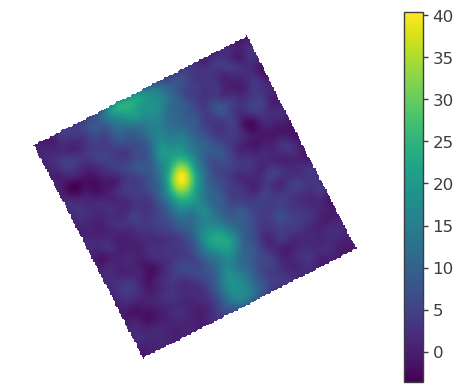

In [31]:
%matplotlib inline
#####   Data Initialize
activate_warnings()
# maptree = "../../data/gcd_new.root"
# maptree =  "../../data/20210305_20230731_ihep_no_goodlist.root"

# maptree =  "../../data/20210305_20230731_ihep_goodlist.root"


maptree =  "../../data/20210305-20230731_trans_fromhsc.root"
response = "../../data/DR_ihep_MK2_newoldDRpsf.root"
# response = "../../data/DR_ihep_MK2.root"
# response = "../../data/DR_ihep_MK2_newpsf.root"

# response = "../../data/DR_ihep_mk_luoyu.root"
# response = "../../data/DR_ihep_mk_MC1.root"
# response = "../../data/DR_ihep_mk_MC2.root"
# response = "../../data/DR_ihep_MK2_luoyu.root"

region_name="Diffuse_WCDA_freeprm"
if not os.path.exists(f'../res/{region_name}/'):
    os.system(f'mkdir ../res/{region_name}/')

nside=2**10
npix=hp.nside2npix(nside)
pixarea = 4 * np.pi/npix


pixIdx = hp.nside2npix(nside) # number of pixels I can get from this nside
pixIdx = np.arange(pixIdx) # pixel index numbers
new_lats = hp.pix2ang(nside, pixIdx)[0] # thetas I need to populate with interpolated theta values
new_lons = hp.pix2ang(nside, pixIdx)[1] # phis, same
c_icrs = SkyCoord(ra=new_lons*180/np.pi*u.degree, dec=90*u.degree-new_lats*180/np.pi*u.degree, frame='icrs')
c_l=c_icrs.galactic.l.deg
c_b=c_icrs.galactic.b.deg

resultsall = []
for i,gl in enumerate(tqdm([35])): # #range(15,365,10)
    c_gal = SkyCoord(l=(gl)*u.degree, b=0*u.degree, frame='galactic')
    RA_center=c_gal.icrs.ra.deg
    Dec_center=c_gal.icrs.dec.deg
    if (Dec_center<-20. or Dec_center>80.): continue
    signal=np.zeros(npix,dtype=np.float64)
    mask = ( (c_l< gl + 5) & (c_l > gl - 5) & (c_b <5.) & (c_b>-5) & (90-new_lats/np.pi*180>-20) & (90-new_lats/np.pi*180<80)) #&(new_lats<110/180*np.pi )  & (new_lats > 10/180*np.pi )
        
    signal[mask]=1
    # hp.mollview(signal,title="ROI",norm='hist')
    # hp.graticule()
    ra1,dec1=RA_center, Dec_center

    data_radius = 7.0
    model_radius = 7.5

    roi = HealpixMapROI(ra=ra1,dec=dec1, data_radius=data_radius, model_radius=model_radius, roimap=signal)

    WCDA = HAL("WCDA", maptree, response, roi, flat_sky_pixels_size=0.2)

    #####   Data Situation
    %matplotlib inline
    WCDA.set_active_measurements(0, 5)
    WCDA.display()
    WCDA.psf_integration_method="exact"

    Modelname=f"roi_{gl - 5}-{gl + 5}"
    if not os.path.exists(f'../res/{region_name}/{Modelname}/'):
        os.system(f'mkdir ../res/{region_name}/{Modelname}/')
    fig = WCDA.display_stacked_image(smoothing_kernel_sigma=0.25)
    fig.savefig(f"../res/{region_name}/{Modelname}_counts_all.png",dpi=300)

    lm = my.getcatModel(ra1, dec1, data_radius, model_radius, rtsigma=5, rtflux=20, rtindex=10, rtp=5,  detector="WCDA", roi=roi, pf=False, sf=False,  mkf=False, mindexf=False)

    Diffuse, diffscaleratio = my.set_diffusebkg(
                ra1, dec1, 6, 6, Kf=False, indexf=False, name=region_name, ifreturnratio=True, Kb=(1e-15, 1e-10), indexb=(-4.5, -0.5)
                )
    
    lm.add_source(Diffuse)

    lm.save(f"../res/{region_name}/{Modelname}/Model_init.yml", overwrite=True)
    lm.display(complete=True)

    result = my.fit(region_name, Modelname, WCDA, lm, 0, 5, mini="PAGMO") #, ifgeterror=True
    sources = my.get_sources(lm,result)
    resultsall.append([result, sources, diffscaleratio])

    resu = my.getressimple(WCDA, lm)
    new_source_idx = np.where(resu==np.ma.max(resu))[0][0]
    new_source_lon_lat=hp.pix2ang(1024,new_source_idx,lonlat=True)
    print(new_source_lon_lat)

    plt.figure()
    hp.gnomview(resu,norm='',rot=[ra1,dec1],xsize=200,ysize=200,reso=6,title=Modelname)
    plt.scatter(new_source_lon_lat[0],new_source_lon_lat[1],marker='x',color='red')
    plt.show()
    plt.savefig(f"../res/{region_name}/{Modelname}_res.png",dpi=300)

    map2, skymapHeader = hp.read_map("../../data/fullsky_WCDA_llh-2.6.fits.gz",h=True)
    map2 = my.maskroi(map2, roi)
    sources.pop("Diffuse")
    fig = my.drawmap(region_name, Modelname, sources, map2, ra1, dec1, rad=2*data_radius, contours=[10000],save=1, 
                    color="Fermi",
                    colors = my.colorall
                    )
    # try:
    Flux_WCDA0, jls0  = my.getdatapoint(WCDA, lm, maptree, response, roi, "Diffuse", ifpowerlawM=1)
    import matplotlib as mpl

    x_Max=50.
    x_Min=1
    y_Min=0.8e-13
    y_Max=2e-10
    fig,ax = plt.subplots()
    plot_spectra(
        result[0].results,
        sources_to_use=["Diffuse"], #,"ext1","ext2","ext4","ext5","ext6","ext7"|
        include_extended=True,
        ene_min=x_Min,
        ene_max=x_Max,
        num_ene=30,
        energy_unit="TeV",
        flux_unit="TeV/(s cm2)",
        subplot=ax,
        )

    my.Draw_sepctrum_points(region_name, Modelname, Flux_WCDA0,"Diffuse","tab:red")

    ax.set_xlim(x_Min,x_Max)
    ax.set_ylim(y_Min,y_Max)
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_ylabel(r"$E^2\,dN/dE$ [TeV cm$^{-2}$ s$^{-1}$]")
    ax.set_xlabel("Energy [TeV]")
    plt.legend()
    plt.savefig(f'../res/{region_name}/{Modelname}/Spectrum.png', dpi=300)
    plt.savefig(f'../res/{region_name}/{Modelname}/Spectrum.pdf')
    # except:
    #     continue


In [5]:
gc = []
dk = []
dkf = []
de = []
di = []
die = []
den = []
dep = []
dien = []
diep = []
for i in range(len(resultsall)):
    gc.append(range(15,365,10)[i])
    dk.append(resultsall[i][0][1][0].loc["Diffuse.spectrum.main.Powerlaw.K"]["value"])
    de.append(resultsall[i][0][1][0].loc["Diffuse.spectrum.main.Powerlaw.K"]["error"])
    den.append(abs(resultsall[i][0][1][0].loc["Diffuse.spectrum.main.Powerlaw.K"]["negative_error"]))
    dep.append(abs(resultsall[i][0][1][0].loc["Diffuse.spectrum.main.Powerlaw.K"]["positive_error"]))
    di.append(resultsall[i][0][1][0].loc["Diffuse.spectrum.main.Powerlaw.index"]["value"])
    die.append(resultsall[i][0][1][0].loc["Diffuse.spectrum.main.Powerlaw.index"]["error"])
    dien.append(abs(resultsall[i][0][1][0].loc["Diffuse.spectrum.main.Powerlaw.index"]["negative_error"]))
    diep.append(abs(resultsall[i][0][1][0].loc["Diffuse.spectrum.main.Powerlaw.index"]["positive_error"]))
    dkf.append(resultsall[i][2])
results=[gc,dk,de,den,dep,di,die,dien,diep, dkf]
np.save(f"../res/{region_name}/resultsall.npy",results)

In [8]:
gc = []
dk = []
dkf = []
de = []
di = []
die = []
den = []
dep = []
dien = []
diep = []
for i in range(len(resultsall)):
    gc.append(range(15,365,10)[i])
    dk.append(resultsall[i][0][1][0].loc["Diffuse.spectrum.main.Powerlaw.K"]["value"])
    de.append(resultsall[i][0][1][0].loc["Diffuse.spectrum.main.Powerlaw.K"]["error"])
    den.append(abs(resultsall[i][0][1][0].loc["Diffuse.spectrum.main.Powerlaw.K"]["negative_error"]))
    dep.append(abs(resultsall[i][0][1][0].loc["Diffuse.spectrum.main.Powerlaw.K"]["positive_error"]))
    di.append(resultsall[i][0][1][0].loc["Diffuse.spectrum.main.Powerlaw.index"]["value"])
    die.append(resultsall[i][0][1][0].loc["Diffuse.spectrum.main.Powerlaw.index"]["error"])
    dien.append(abs(resultsall[i][0][1][0].loc["Diffuse.spectrum.main.Powerlaw.index"]["negative_error"]))
    diep.append(abs(resultsall[i][0][1][0].loc["Diffuse.spectrum.main.Powerlaw.index"]["positive_error"]))
    dkf.append(resultsall[i][2])
oldresults=[gc,dk,de,den,dep,di,die,dien,diep, dkf]
oldresults = np.array(oldresults)
oldresults[:,0][0] =75
oldresults = oldresults[:,0]

In [8]:
region_name="Diffuse_WCDA_fprm"
results = np.load(f"../res/{region_name}/resultsall2.npy")
gc=results[0]
dk=results[1]
den=results[3]
dep=results[4]
di = results[5]
die = results[6]
dien = results[7]
diep = results[8]
dkf = results[9]
results[:,6] = oldresults
np.save(f"../res/{region_name}/resultsall2.npy",results)

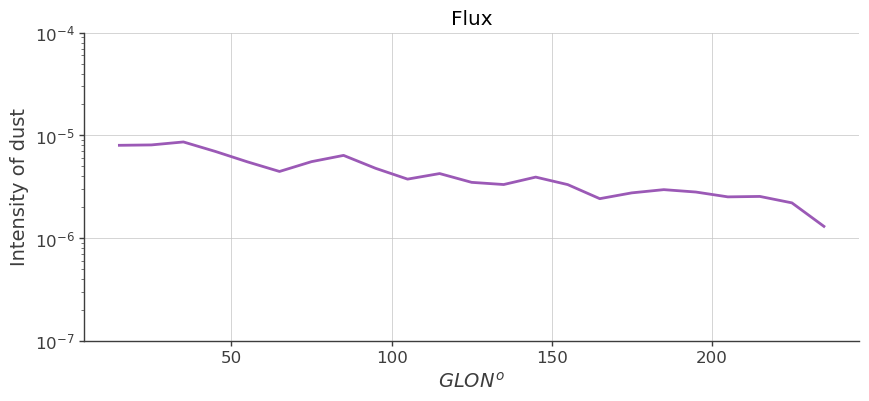

In [19]:
plt.figure(figsize=(10,4)) #
plt.plot(gc, np.array(dkf)*0.00012671770357488944) #np.array(den)*1e9, np.array(dep)*1e9 , fmt="o"
plt.yscale("log")
plt.title("Flux")

plt.ylabel(r"Intensity of dust")
plt.ylim(1e-7, 1e-4)
plt.grid()
plt.xlabel(r"$GLON^{o}$")
plt.savefig(f"../res/{region_name}/dust.png",dpi=300)
plt.savefig(f"../res/{region_name}/dust.pdf",dpi=300)

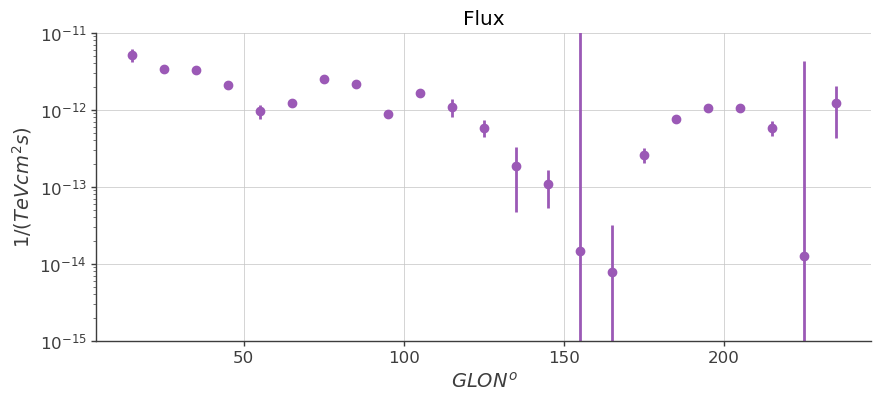

In [20]:
plt.figure(figsize=(10,4)) #
plt.errorbar(gc, np.array(dk)*1e9, [np.array(de)*1e9, np.array(de)*1e9], fmt="o") #np.array(den)*1e9, np.array(dep)*1e9
plt.yscale("log")
plt.title("Flux")
plt.ylim(1e-15, 1e-11)
plt.ylabel(r"$1/(TeV cm^{2} s)$")
plt.grid()
plt.xlabel(r"$GLON^{o}$")
plt.savefig(f"../res/{region_name}/flux.png",dpi=300)
plt.savefig(f"../res/{region_name}/flux.pdf",dpi=300)

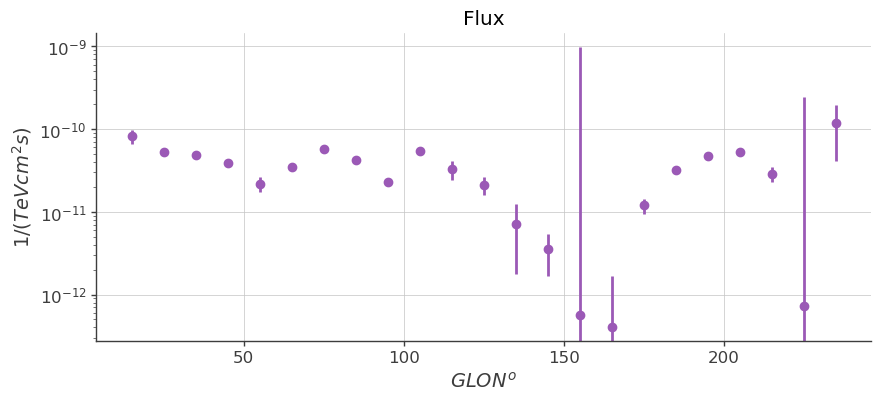

In [9]:
plt.figure(figsize=(10,4)) #
plt.errorbar(gc, np.array(dk)*1e9/np.array(dkf), [np.array(de)*1e9/np.array(dkf), np.array(de)*1e9/np.array(dkf)], fmt="o") #np.array(den)*1e9, np.array(dep)*1e9
plt.yscale("log")
plt.title("Flux")
# plt.ylim(1e-15, 1e-11)
plt.ylabel(r"$1/(TeV cm^{2} s)$")
plt.grid()
plt.xlabel(r"$GLON^{o}$")
plt.savefig(f"../res/{region_name}/flux_fullsky.png",dpi=300)
plt.savefig(f"../res/{region_name}/flux_fullsky.pdf",dpi=300)

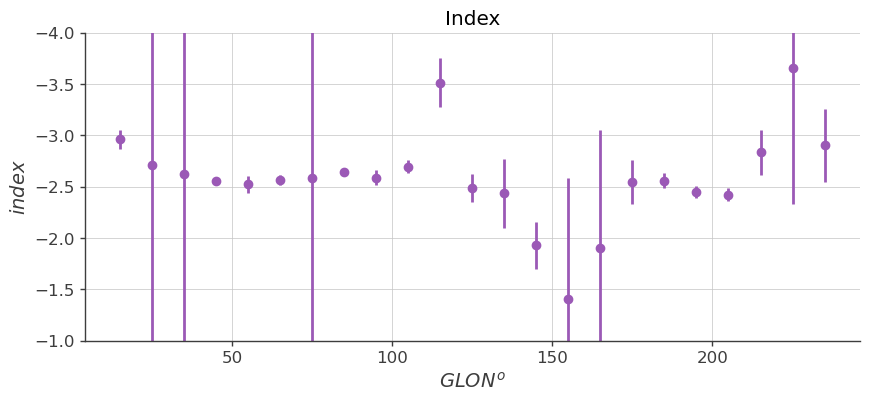

In [10]:
plt.figure(figsize=(10,4)) #
plt.errorbar(gc, di, [die, die], fmt="o") #dien, diep
plt.ylim(-1,-4)
plt.title("Index")
plt.ylabel(r"$index$")
plt.xlabel(r"$GLON^{o}$")
plt.grid()
plt.savefig(f"../res/{region_name}/index.png",dpi=300)
plt.savefig(f"../res/{region_name}/index.pdf",dpi=300)

roi_10-20


processing MLE analyses:   0%|          | 0/1 [00:00<?, ?it/s]

Propagating errors:   0%|          | 0/30 [00:00<?, ?it/s]

roi_20-30


processing MLE analyses:   0%|          | 0/1 [00:00<?, ?it/s]

Propagating errors:   0%|          | 0/30 [00:00<?, ?it/s]

roi_30-40


processing MLE analyses:   0%|          | 0/1 [00:00<?, ?it/s]

Propagating errors:   0%|          | 0/30 [00:00<?, ?it/s]

roi_40-50


processing MLE analyses:   0%|          | 0/1 [00:00<?, ?it/s]

Propagating errors:   0%|          | 0/30 [00:00<?, ?it/s]

roi_50-60


processing MLE analyses:   0%|          | 0/1 [00:00<?, ?it/s]

Propagating errors:   0%|          | 0/30 [00:00<?, ?it/s]

roi_60-70


processing MLE analyses:   0%|          | 0/1 [00:00<?, ?it/s]

Propagating errors:   0%|          | 0/30 [00:00<?, ?it/s]

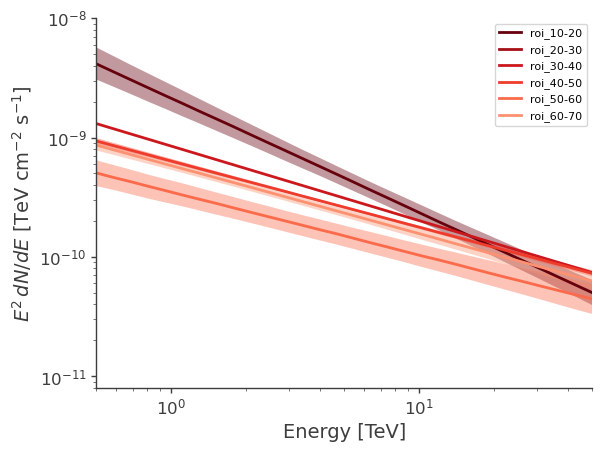

In [21]:
%matplotlib inline
import glob
x_Max=50.
x_Min=0.5
y_Min=0.8e-11
y_Max=1e-8
fig,ax = plt.subplots()
folder_path = f"/data/home/cwy/Science/3MLWCDA/Standard/res/{region_name}"
subfolders = glob.glob(folder_path + '/**/', recursive=True)
sorted_files = sorted(subfolders[1:], key=lambda x: int(x.split('_')[-1].split('-')[-2]))
# 打印所有找到的子文件夹路径
for i,subfolder in enumerate(sorted_files[:6]):
    name = subfolder.split("/")[-2]
    print(name)
    specpath = subfolder+"Results.fits"
    resultsss = load_analysis_results(specpath)
    # try:
    plot_spectra(
        resultsss,
        sources_to_use=["Diffuse"],
        include_extended=True,
        ene_min=x_Min,
        ene_max=x_Max,
        num_ene=30,
        energy_unit="TeV",
        flux_unit=f"TeV/(s cm2)", #*
        subplot=ax,
        plot_style_kwargs={"label":name, "color":my.red_palette[-(i+1)], "scale":1/dkf[i]} #
        )
    # except Exception as e:
    #     print(f"Error: {e}")
    #     continue
    

ax.set_xlim(x_Min,x_Max)
ax.set_ylim(y_Min,y_Max)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylabel(r"$E^2\,dN/dE$ [TeV cm$^{-2}$ s$^{-1}$]")
ax.set_xlabel("Energy [TeV]")
ax.legend()
plt.savefig(f"../res/{region_name}/spectrum_band10-70.png",dpi=300)
plt.savefig(f"../res/{region_name}/spectrum_band10-70.pdf",dpi=300)

roi_70-80


processing MLE analyses:   0%|          | 0/1 [00:00<?, ?it/s]

Propagating errors:   0%|          | 0/30 [00:00<?, ?it/s]

roi_80-90


processing MLE analyses:   0%|          | 0/1 [00:00<?, ?it/s]

Propagating errors:   0%|          | 0/30 [00:00<?, ?it/s]

roi_90-100


processing MLE analyses:   0%|          | 0/1 [00:00<?, ?it/s]

Propagating errors:   0%|          | 0/30 [00:00<?, ?it/s]

roi_100-110


processing MLE analyses:   0%|          | 0/1 [00:00<?, ?it/s]

Propagating errors:   0%|          | 0/30 [00:00<?, ?it/s]

roi_110-120


processing MLE analyses:   0%|          | 0/1 [00:00<?, ?it/s]

Propagating errors:   0%|          | 0/30 [00:00<?, ?it/s]

roi_120-130


processing MLE analyses:   0%|          | 0/1 [00:00<?, ?it/s]

Propagating errors:   0%|          | 0/30 [00:00<?, ?it/s]

roi_130-140


processing MLE analyses:   0%|          | 0/1 [00:00<?, ?it/s]

Propagating errors:   0%|          | 0/30 [00:00<?, ?it/s]

roi_140-150


processing MLE analyses:   0%|          | 0/1 [00:00<?, ?it/s]

Propagating errors:   0%|          | 0/30 [00:00<?, ?it/s]

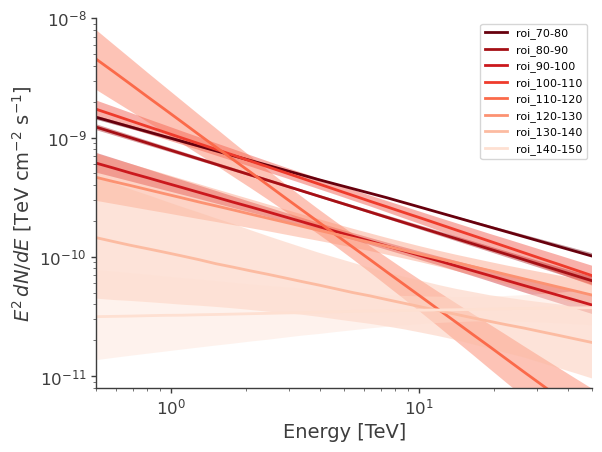

In [14]:
%matplotlib inline
import glob
x_Max=50.
x_Min=0.5
y_Min=0.8e-11
y_Max=1e-8
fig,ax = plt.subplots()
folder_path = f"/data/home/cwy/Science/3MLWCDA/Standard/res/{region_name}"
subfolders = glob.glob(folder_path + '/**/', recursive=True)
sorted_files = sorted(subfolders[1:], key=lambda x: int(x.split('_')[-1].split('-')[-2]))
# 打印所有找到的子文件夹路径
for i,subfolder in enumerate(sorted_files[6:14]):
    name = subfolder.split("/")[-2]
    print(name)
    specpath = subfolder+"Results.fits"
    resultsss = load_analysis_results(specpath)
    # try:
    plot_spectra(
        resultsss,
        sources_to_use=["Diffuse"],
        include_extended=True,
        ene_min=x_Min,
        ene_max=x_Max,
        num_ene=30,
        energy_unit="TeV",
        flux_unit=f"TeV/(s cm2)", #*
        subplot=ax,
        plot_style_kwargs={"label":name, "color":my.red_palette[-(i+1)], "scale":1/dkf[i+6]} #
        )
    # except Exception as e:
    #     print(f"Error: {e}")
    #     continue
    

ax.set_xlim(x_Min,x_Max)
ax.set_ylim(y_Min,y_Max)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylabel(r"$E^2\,dN/dE$ [TeV cm$^{-2}$ s$^{-1}$]")
ax.set_xlabel("Energy [TeV]")
ax.legend()
plt.savefig(f"../res/{region_name}/spectrum_band70-150.png",dpi=300)
plt.savefig(f"../res/{region_name}/spectrum_band70-150.pdf",dpi=300)

In [ ]:
x_Max=50.
x_Min=0.5
y_Min=0.8e-12
y_Max=2e-10
fig,ax = plt.subplots()
folder_path = "/data/home/cwy/Science/3MLWCDA/Standard/res/Diffuse"
subfolders = glob.glob(folder_path + '/**/', recursive=True)
sorted_files = sorted(subfolders[1:], key=lambda x: int(x.split('_')[1].split('-')[0]))
# 打印所有找到的子文件夹路径
for i,subfolder in enumerate(sorted_files[16:23]):
    name = subfolder.split("/")[-2]
    print(name)
    specpath = subfolder+"Spectrum_Diffuse.txt"
    my.Draw_spectrum_fromfile(specpath, label=name, color=my.colorall[i], subplot=ax)

ax.set_xlim(x_Min,x_Max)
ax.set_ylim(y_Min,y_Max)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylabel(r"$E^2\,dN/dE$ [TeV cm$^{-2}$ s$^{-1}$]")
ax.set_xlabel("Energy [TeV]")
ax.legend()